# Trigonometric form of Fourier series
>CIVE 586 Assignment1  
>Created by: Mingda Lyu   
>Created date: 2024-9-30  
>Last modified: 2024-9-30  

<Figure size 1200x1500 with 0 Axes>

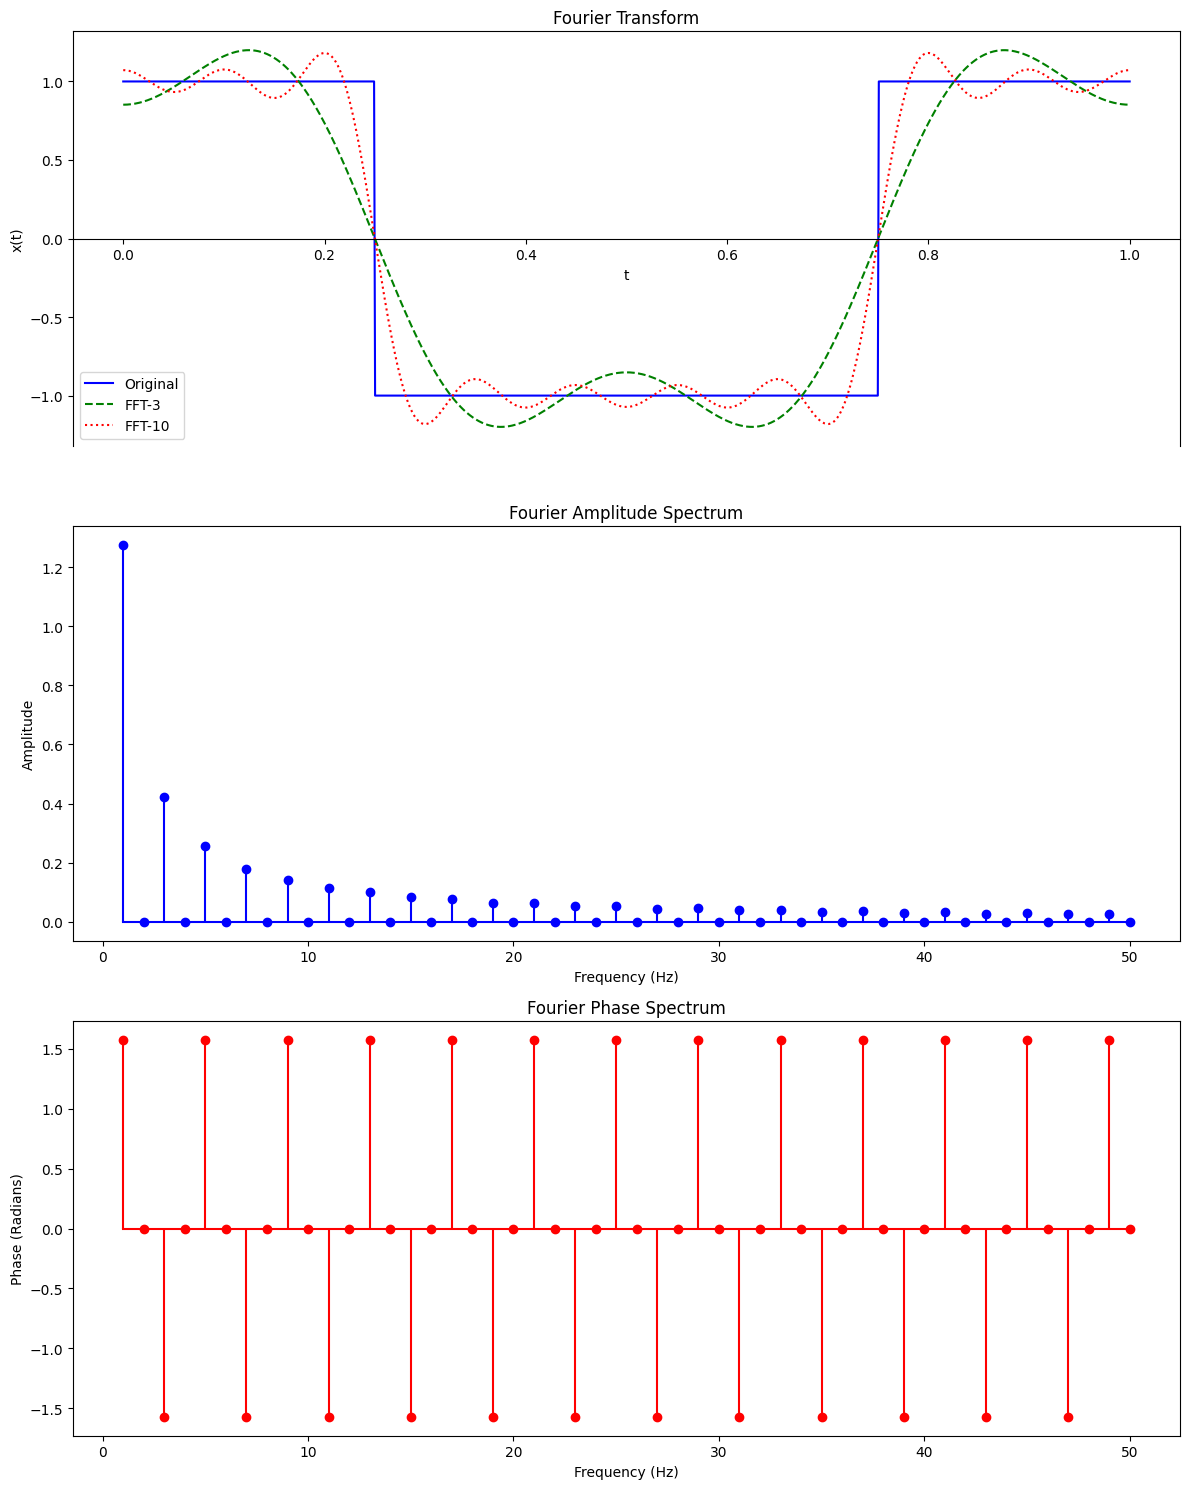

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
A = 1        # Amplitude
Tf = 1       # Period of the square wave
fs = 1000    # Sampling frequency
t = np.linspace(0,Tf,fs)  # Time array
thres = 10**-2  # Filter threshold

# Square wave generation
x = np.zeros_like(t)
x[(t <= Tf/4) | (t > 3*Tf/4)] = A
x[(t > Tf/4) & (t <= 3*Tf/4)] = -A

# Fourier transform
a_0 = 1/Tf * np.sum(x)

def get_an(Tf,ut,t,fs,n):
    # Initialize a 'an' array
    an = np.zeros(n)
    for i in range(1,n+1):
        an[i-1] = 2/Tf*np.sum(ut*np.cos(2*np.pi*i*t/Tf)*1/fs)
        if abs(an[i-1]) < thres:
            an[i-1] = 0
    return an

def get_bn(Tf,ut,t,fs,n):
    # Initialize a 'bn' array
    bn = np.zeros(n)
    for i in range(1,n+1):
        bn[i-1]=2/Tf*np.sum(ut*np.sin(2*np.pi*i*t/Tf)*1/fs)
        if abs(bn[i-1]) < thres:
             bn[i-1] = 0
    return bn

def fourier_series(Tf,ut,t,fs,n):
    ft_output = np.zeros_like(t)
    an = get_an(Tf,ut,t,fs,n)
    bn = get_bn(Tf,ut,t,fs,n)
    for i in range(1,n+1):
        ft_output += (an[i-1]*np.cos(2*np.pi*i/Tf*t)+bn[i-1]*np.sin(2*np.pi*i/Tf*t))
    ft_output = a_0 + ft_output
    amplitude_spectrum = np.sqrt(an**2+bn**2)
    phase_spectrum = np.arctan2(an,bn) 
    frequencies = np.arange(1, n+1)/Tf
    return ft_output, amplitude_spectrum, phase_spectrum, frequencies

x_3_terms, _, _, _ = fourier_series(Tf,x,t,fs,3)
x_10_terms, _, _, _ = fourier_series(Tf,x,t,fs,10)
x_100_terms, amplitude_spectrum, phase_spectrum, frequencies = fourier_series(Tf,x,t,fs,100)

# Considering the Nyquist frequency
N = len(frequencies)
frequencies = frequencies[:N//2]
amplitude_spectrum = amplitude_spectrum[:N//2]
phase_spectrum = phase_spectrum[:N//2]

# Plotting
plt.figure(figsize=(12, 15))

# Fourier Transform demonstration
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15))
ax1.spines['bottom'].set_position(('data', 0))  #Setting x-axis to y=0
ax1.plot(t, x, label='Original', linestyle='-', color='blue')
ax1.plot(t, x_3_terms, label='FFT-3', linestyle='--', color='green')
ax1.plot(t, x_10_terms, label='FFT-10', linestyle=':', color='red')
ax1.set_title('Fourier Transform')
ax1.set_xlabel('t')
ax1.set_ylabel('x(t)')
ax1.legend()

# Amplitude spectrum plot
plt.subplot(3, 1, 2)
plt.stem(frequencies, amplitude_spectrum, 'b', markerfmt="o", basefmt="-b")
plt.title('Fourier Amplitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

# Phase spectrum plot
plt.subplot(3, 1, 3)
plt.stem(frequencies, phase_spectrum, 'r', markerfmt="o", basefmt="-r")
plt.title('Fourier Phase Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (Radians)')

plt.tight_layout()
plt.show()
